## **Football Team Nemesis**

##### **Data Preparation**

In [ ]:
# imports
import numpy as np
import pandas as pd

Data from season 2005/06

In [ ]:
serieA = pd.read_csv('../data/serieAData.csv')
serieA.head(2)

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Fiorentina,Sampdoria,2.0,1.0
1,Livorno,Lecce,2.0,1.0


In [ ]:
# count distinct values
serieA['HomeTeam'].nunique()

41

In [ ]:
len(serieA)

6465

In [ ]:
games_per_season = 38
number_of_seasons = 17
matches_per_year = 380
len(serieA) / matches_per_year

17.013157894736842

In [ ]:
# aggregate and get results

df_agg = pd.DataFrame(columns=['team','opponent','sum_points','num_games'], dtype=float)
df_results = pd.DataFrame(columns=['team','opponent','result','num_occurences'], dtype=float)

for team in serieA['HomeTeam'].unique():
    df_interim = pd.DataFrame(columns=['team','opponent','result','home'], dtype=float)

    # get all the home games of the team
    home = serieA[serieA['HomeTeam'] == team]
    # for every such game, get the opponent and the result, from the perspective of the home team
    home.reset_index(inplace=True)
    for i in range(len(home)):
        opponent = home['AwayTeam'][i]
        if home['HomeGoals'][i] > home['AwayGoals'][i]: # if the home team won
            df_interim.loc[len(df_interim)]=[team, opponent, 3, 1 ]
        elif home['HomeGoals'][i] < home['AwayGoals'][i]: # if the home team lost
            df_interim.loc[len(df_interim)]=[team, opponent, 0, 1 ]
        else: # if it was a draw
            df_interim.loc[len(df_interim)]=[team, opponent, 1, 1 ]
    
    # get all the matches that this team was away
    away = serieA[serieA['AwayTeam']==team]
    away.reset_index(inplace=True)
    # for every such game, get the opponent and the result, from the perspective of the away team
    for i in range(len(away)):
        opponent = away['HomeTeam'][i]
        if away['HomeGoals'][i] > away['AwayGoals'][i]: # if the away team lost
            df_interim.loc[len(df_interim)]=[team, opponent, 0, 0 ]
        elif away['HomeGoals'][i] < away['AwayGoals'][i]: # if the away team won
            df_interim.loc[len(df_interim)]=[team, opponent, 3, 0 ]
        else: # if it was a draw
            df_interim.loc[len(df_interim)]=[team, opponent, 1, 0 ]
            
    # calculate the result summary and store that
    t = pd.DataFrame({'sum_points': df_interim.groupby(['team', 'opponent'])['result'].sum(),
                      'num_games' : df_interim.groupby(['team', 'opponent'])['result'].size()})
    t['pct_points'] = t['sum_points']/(t['num_games']*3)*100
    t.reset_index(inplace=True)
    df_agg = pd.concat([df_agg, t])
    
    # for more accuracy in reporting, calculate also the exact number of games for each result
    
    t = pd.DataFrame({'num_occurences' : df_interim.groupby(['team', 'opponent','result']).size()})
    t.reset_index(inplace=True)
    df_results = pd.concat([df_results, t])

In [ ]:
df_results.to_csv('../data/results_per_team_and_opponent.csv', index=False)
df_agg.to_csv('../data/aggregated_result_per_team_and_opponent.csv', index=False)

In [ ]:
df_results.head()

,team,opponent,result,num_occurences
0,Fiorentina,Ascoli,1.0,1.0
1,Fiorentina,Ascoli,3.0,3.0
2,Fiorentina,Atalanta,0.0,6.0
3,Fiorentina,Atalanta,1.0,9.0
4,Fiorentina,Atalanta,3.0,15.0


In [ ]:
df_agg.head()

,team,opponent,sum_points,num_games,pct_points
0,Fiorentina,Ascoli,10.0,4.0,83.333333
1,Fiorentina,Atalanta,54.0,30.0,60.000000
2,Fiorentina,Bari,7.0,4.0,58.333333
3,Fiorentina,Benevento,9.0,4.0,75.000000
4,Fiorentina,Bologna,51.0,26.0,65.384615


Get the total number of games that each team played across all these years, and extract the teams that played at least 300 games across all these years.

In [ ]:
tot_number_of_games = pd.DataFrame({'total_num_games' : df_agg.groupby('team')['num_games'].sum()})
tot_number_of_games.reset_index(inplace = True)

print(len(tot_number_of_games['team']))
print(len(tot_number_of_games[tot_number_of_games['total_num_games'] > 300]))
pd.merge(tot_number_of_games[tot_number_of_games['total_num_games'] > 300], serieA[['HomeTeam']],
                            left_on='team', right_on='HomeTeam', how='inner').drop_duplicates().sort_values(by=['team'])

41
20


,team,total_num_games,HomeTeam
0,Atalanta,570.0,Atalanta
285,Bologna,494.0,Bologna
532,Cagliari,608.0,Cagliari
836,Catania,304.0,Catania
988,Chievo,494.0,Chievo
1235,Empoli,304.0,Empoli
1387,Fiorentina,646.0,Fiorentina
1710,Genoa,570.0,Genoa
1995,Inter,646.0,Inter
2318,Juventus,608.0,Juventus


In [ ]:
print(games_per_season * number_of_seasons)

646


In [ ]:
df_aggregated = pd.merge(tot_number_of_games.drop_duplicates(), df_agg, on ='team', how='inner')

In [ ]:
df_aggregated.head()

,team,total_num_games,opponent,sum_points,num_games,pct_points
0,Ascoli,76.0,Atalanta,0.0,2.0,0.000000
1,Ascoli,76.0,Cagliari,4.0,4.0,33.333333
2,Ascoli,76.0,Catania,2.0,2.0,33.333333
3,Ascoli,76.0,Chievo,5.0,4.0,41.666667
4,Ascoli,76.0,Empoli,6.0,4.0,50.000000


In [ ]:
df_aggregated.to_csv('../data/aggregated_result_per_team_and_opponent.csv')

##### **Data Modeling**

In [1]:
# imports
import numpy as np
import pandas as pd

In [2]:
df_results = pd.read_csv('../data/results_per_team_and_opponent.csv')
df_aggregated = pd.read_csv('../data/aggregated_result_per_team_and_opponent.csv')

In [3]:
# get the worst performing opponent for each team
team = 'Milan'
temp = df_aggregated[(df_aggregated['total_num_games'] > 300) & (df_aggregated['team'] == team) & (df_aggregated['num_games'] > 10)].sort_values(by='result_metric')
temp.loc[temp['result_metric'].idxmin(),'opponent']

'Verona'

In [3]:
# create nemesis df
df_nemesis = pd.DataFrame(columns = ['team', 'nemesis', 'worst_result', 'num_games'])

# filter only for teams that have at least 300 games in the dataset
for team in df_aggregated[df_aggregated['total_num_games'] > 300]['team'].unique():
    temp = df_aggregated[(df_aggregated['total_num_games'] > 300) & (df_aggregated['team'] == team) & (df_aggregated['num_games'] > 10)].sort_values(by='sum_points')
    nemesis = temp.loc[temp['pct_points'].idxmin(), 'opponent']
    num_games = temp.loc[temp['pct_points'].idxmin(), 'num_games']
    df_nemesis.loc[len(df_nemesis)] = [team, nemesis, temp['pct_points'].min(), num_games] 

In [4]:
df_nemesis['worst_result'] = round(df_nemesis['worst_result'],2)
df_nemesis.rename(columns={'worst_result':'pct_points'}, inplace=True)

In [5]:
df_nemesis.sort_values(by='pct_points', ascending=False)

,team,nemesis,pct_points,num_games
9,Juventus,Napoli,52.22,30.0
12,Napoli,Empoli,41.67,12.0
11,Milan,Juventus,31.25,32.0
8,Inter,Juventus,28.12,32.0
15,Roma,Juventus,26.04,32.0
13,Palermo,Inter,25.76,22.0
6,Fiorentina,Roma,25.49,34.0
19,Udinese,Juventus,22.92,32.0
7,Genoa,Roma,21.11,30.0
17,Sassuolo,Juventus,16.67,18.0


In [6]:
df_nemesis.to_csv('../data/team_nemesis.csv')

In [8]:
team = 'Milan'

temp = df_aggregated[(df_aggregated['total_num_games'] > 300) &
                     (df_aggregated['team']==team) & (df_aggregated['num_games'] > 10)].sort_values(by='result_metric')
temp.sort_values(by = 'pct_points')

,Unnamed: 0,team,total_num_games,opponent,result_metric,num_games,pct_of_points
695,695,Milan,646.0,Juventus,30.0,32.0,31.250000
694,694,Milan,646.0,Inter,34.0,34.0,33.333333
700,700,Milan,646.0,Napoli,32.0,30.0,35.555556
706,706,Milan,646.0,Roma,43.0,34.0,42.156863
679,679,Milan,646.0,Atalanta,46.0,30.0,51.111111
715,715,Milan,646.0,Udinese,57.0,34.0,55.882353
691,691,Milan,646.0,Fiorentina,57.0,34.0,55.882353
708,708,Milan,646.0,Sampdoria,56.0,32.0,58.333333
696,696,Milan,646.0,Lazio,60.0,34.0,58.823529
709,709,Milan,646.0,Sassuolo,32.0,18.0,59.259259


In [7]:
df_aggregated.columns

Index(['Unnamed: 0', 'team', 'total_num_games', 'opponent', 'sum_points',
       'num_games', 'pct_points'],
      dtype='object')

In [8]:
# create nemesis df complete
df_nemesis_all = df_aggregated.copy()

df_nemesis_all = df_nemesis_all[(df_nemesis_all['total_num_games'] > 300) &
                     (df_aggregated['num_games'] > 10)].sort_values(by='sum_points')
# df_nemesis_all = df_nemesis_all.sort_values(by = 'pct_of_points')
df_nemesis_all = df_nemesis_all.sort_values(by = 'team')

In [9]:
df_nemesis_all

,Unnamed: 0,team,total_num_games,opponent,sum_points,num_games,pct_points
54,54,Atalanta,570.0,Siena,22.0,12.0,61.111111
29,29,Atalanta,570.0,Catania,16.0,14.0,38.095238
25,25,Atalanta,570.0,Bologna,47.0,24.0,65.277778
38,38,Atalanta,570.0,Juventus,14.0,28.0,16.666667
33,33,Atalanta,570.0,Empoli,23.0,14.0,54.761905
...,...,...,...,...,...,...,...
1165,1165,Udinese,646.0,Chievo,40.0,26.0,51.282051
1186,1186,Udinese,646.0,Sampdoria,40.0,32.0,41.666667
1194,1194,Udinese,646.0,Verona,20.0,14.0,47.619048
1159,1159,Udinese,646.0,Bologna,43.0,26.0,55.128205


In [10]:
df_nemesis_all.columns

Index(['Unnamed: 0', 'team', 'total_num_games', 'opponent', 'sum_points',
       'num_games', 'pct_points'],
      dtype='object')

In [11]:
df_nemesis_all = df_nemesis_all[['team', 'total_num_games', 'opponent', 'sum_points',
       'num_games', 'pct_points']]

In [12]:
df_nemesis_all.to_csv('../data/team_nemesis_all.csv')

##### **Data Visualization**

In [ ]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches
from matplotlib import rcParams
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm

from PIL import Image
import urllib
import os

- Last 17 Serie A seasons
- At least 10 games between the teams

In [ ]:
df_nemesis = pd.read_csv('../data/team_nemesis.csv')
df_nemesis

,Unnamed: 0,team,nemesis,pct_points,num_games
0,0,Atalanta,Juventus,16.67,28.0
1,1,Bologna,Juventus,11.54,26.0
2,2,Cagliari,Milan,9.38,32.0
3,3,Catania,Milan,12.50,16.0
4,4,Chievo,Milan,7.69,26.0
5,5,Empoli,Inter,8.33,16.0
6,6,Fiorentina,Roma,25.49,34.0
7,7,Genoa,Roma,21.11,30.0
8,8,Inter,Juventus,28.12,32.0
9,9,Juventus,Napoli,52.22,30.0


In [ ]:
df_nemesis = df_nemesis[['team', 'nemesis', 'pct_points', 'num_games']]

In [ ]:
df_nemesis = df_nemesis[df_nemesis.team.isin(['Atalanta', 'Fiorentina', 'Inter', 'Juventus',
'Lazio', 'Milan', 'Napoli', 'Roma'])]
df_nemesis

,team,nemesis,pct_points,num_games
0,Atalanta,Juventus,16.67,28.0
6,Fiorentina,Roma,25.49,34.0
8,Inter,Juventus,28.12,32.0
9,Juventus,Napoli,52.22,30.0
10,Lazio,Juventus,14.58,32.0
11,Milan,Juventus,31.25,32.0
12,Napoli,Empoli,41.67,12.0
15,Roma,Juventus,26.04,32.0


In [ ]:
df_nemesis['team_id'] = [8524, 8535, 8636, 9885, 8543, 8564, 9875, 8686]

In [ ]:
df_nemesis['nemesis_id'] = [9885, 8686, 9885, 9875, 9885, 9885, 8534, 9885]

In [ ]:
df_nemesis

,team,nemesis,pct_points,num_games,team_id,nemesis_id
0,Atalanta,Juventus,16.67,28.0,8524,9885
6,Fiorentina,Roma,25.49,34.0,8535,8686
8,Inter,Juventus,28.12,32.0,8636,9885
9,Juventus,Napoli,52.22,30.0,9885,9875
10,Lazio,Juventus,14.58,32.0,8543,9885
11,Milan,Juventus,31.25,32.0,8564,9885
12,Napoli,Empoli,41.67,12.0,9875,8534
15,Roma,Juventus,26.04,32.0,8686,9885


In [ ]:
df_nemesis['pct_points_nem'] = 100 - df_nemesis.pct_points
df_nemesis

,team,nemesis,pct_points,num_games,team_id,nemesis_id,pct_points_nem
0,Atalanta,Juventus,16.67,28.0,8524,9885,83.33
6,Fiorentina,Roma,25.49,34.0,8535,8686,74.51
8,Inter,Juventus,28.12,32.0,8636,9885,71.88
9,Juventus,Napoli,52.22,30.0,9885,9875,47.78
10,Lazio,Juventus,14.58,32.0,8543,9885,85.42
11,Milan,Juventus,31.25,32.0,8564,9885,68.75
12,Napoli,Empoli,41.67,12.0,9875,8534,58.33
15,Roma,Juventus,26.04,32.0,8686,9885,73.96


In [ ]:
df_nemesis['pct_points'] = df_nemesis['pct_points'].round(2)
df_nemesis['pct_points_nem'] = df_nemesis['pct_points_nem'].round(2)

In [ ]:
df_nemesis.dtypes

team               object
nemesis            object
pct_points        float64
num_games         float64
team_id             int64
nemesis_id          int64
pct_points_nem    float64
dtype: object

_Table's Layout_

Our table will have the following columns:

| home_logo (team) | team | away_logo (nemesis) | pct_points | pct_points_nemesis | num_games |

Which results in 6 columns for our table

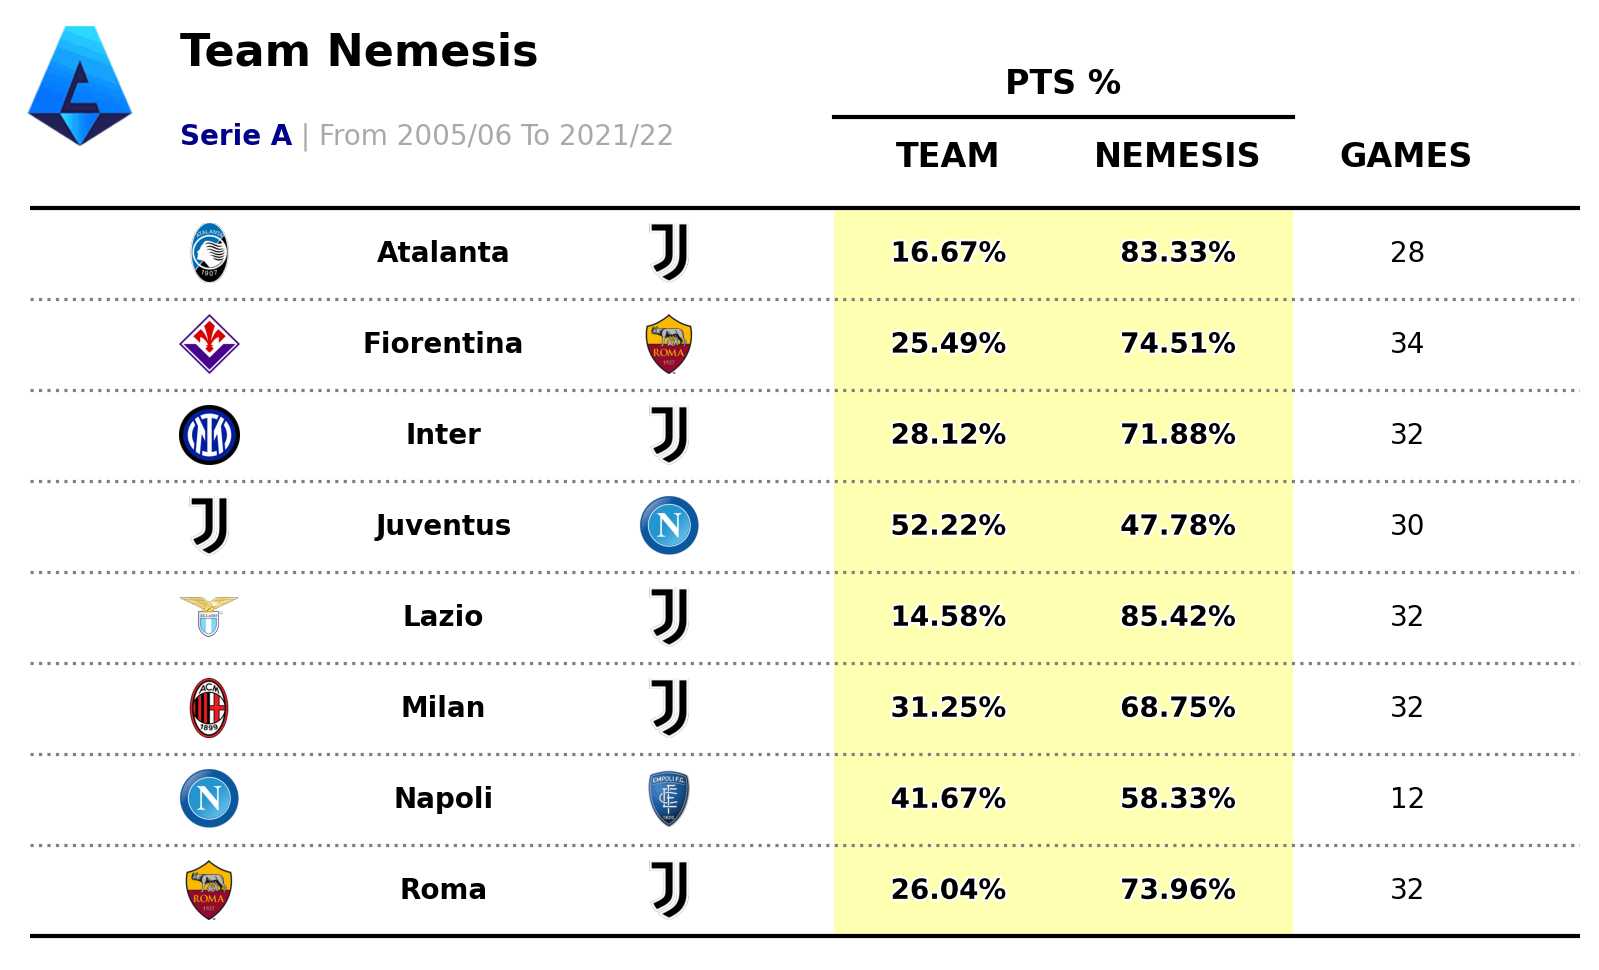

In [ ]:
fig = plt.figure(figsize=(10, 6), dpi = 200)
ax = plt.subplot(111, facecolor = "white")

ncols = 6
nrows = df_nemesis.shape[0]

df_nemesis = df_nemesis.sort_values(by='team', ascending=False).reset_index(drop=True)

ax.set_xlim(0, ncols + .75)
ax.set_ylim(-.15, nrows + 2)

# define URL and helper functions to add logos

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# CMAP for the gradient
cmap = plt.cm.summer

# add team logos

for y in range(nrows):
    # home logo
    x = 0.15
    team_id = df_nemesis['team_id'].iloc[y]
    ax_coords = DC_to_NFC([x + .5, y + .18])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png"))
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # away logo
    x = 3.15
    team_id = df_nemesis['nemesis_id'].iloc[y]
    ax_coords = DC_to_NFC([x - .5, y + .18])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png"))
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # fixture result
    x = 2
    home_name = df_nemesis['team'].iloc[y]
    away_name = df_nemesis['nemesis'].iloc[y]
    num_games = df_nemesis['num_games'].iloc[y]

    label_ = f'{home_name}'
    ax.annotate(
        xy=(x-0.2,y + 0.5),
        text=label_,
        ha='center',
        va='center',
        weight='bold'
    )

# Points Percentage
    points_percentage = df_nemesis['pct_points'].iloc[y]
    points_percentage_nem = df_nemesis['pct_points_nem'].iloc[y]
    label_ph_ = f'{points_percentage}%'
    label_pa_ = f'{points_percentage_nem}%'
    # Pts Team
    x = 4
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_ph_,
        ha='center',
        va='center',
        size=10,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
    )
    # -- Pts Nemesis
    x = 5
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_pa_,
        ha='center',
        va='center',
        size=10,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
    )

    # adding the colors
    # subtract and add .5 beacause the width of the column is 1, 1/2 = .5
    x = 4
    ax.fill_between(
        x=[(x - .5), (x + .5)],
        y1=y,
        y2=y + 1,
        color=cmap(points_percentage),
        zorder=2,
        ec="None",
        alpha=0.5
    )
    x = 5
    ax.fill_between(
        x=[(x - .5), (x + .5)],
        y1=y,
        y2=y + 1,
        color=cmap(points_percentage_nem),
        zorder=2,
        ec="None",
        alpha=0.5
    )

# games
    num_games = df_nemesis['num_games'].iloc[y]
    label_ng_ = f'{num_games:.0f}'
    # number of games
    x = 6
    ax_text(
        x=x,y=y+0.5,
        s=label_ng_,
        ha='center',
        va='center',
        size=10,
        ax=ax
    )

# table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw = 1.5, color = 'black', marker = '', zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw = 1.5, color = 'black', marker = '', zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw = 1.15, color = 'gray', ls = ':', zorder = 3 , marker = '')

# column titles
ax.annotate(
    xy = (1.825, nrows + .5),
    text = "", # TEAM
    weight = "bold",
    ha = "left",
    size = 12
)
ax.annotate(
    xy = (5.7, nrows + .45),
    text = 'GAMES',
    weight = "bold",
    ha = "left",
    size = 12
)

title_positions = [4 + 1*i for i in range(0,5)]
title_labels = ['TEAM' if i % 2 == 0 else 'NEMESIS' for i in range(0,5)]
for index in range(0,2):
    ax.annotate(
        xy = (title_positions[index], nrows + .45),
        text = title_labels[index],
        weight = "bold",
        ha = "center",
        size = 12
    )
    # lines
    if index % 2 != 0:
        continue
    ax.plot(
        [title_positions[index] - .5, title_positions[index + 1] + .5],
        [nrows + 1, nrows + 1],
        lw = 1.5,
        color = 'black'
    )

ax.annotate(
    xy = ((4 + 5)/2, nrows + 1.25),
    text = 'PTS %',
    weight = "bold",
    ha = "center",
    size = 12
)

ax.set_axis_off()

fig_text(
    x = 0.2, y = 0.84, 
    s = "Team Nemesis",
    va = "bottom", ha = "left",
    fontsize = 16, color = "black", weight = "bold"
)

fig_text(
    x = 0.2, y = 0.80, 
    s = "<Serie A> | From 2005/06 To 2021/22",
    highlight_textprops=[
        {"color": "darkblue", "weight": "bold"}
    ],
    color = "darkgrey",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/55.png"

logo_ax = fig.add_axes([0.1, 0.78, 0.1, 0.1], zorder=1) # position and then size 
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

plt.savefig(
	"../figures/team-nemesis-serieA.png",
	dpi = 300,
	facecolor = "white",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"../figures/team-nemesis-serieA_tr.png",
	dpi = 300,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)